In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_SCS_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,59960,59960,59920,59960,34010
1,2019-03-04,59960,60080,58980,59960,8580
2,2019-03-05,58720,60010,58720,59960,35720
3,2019-03-06,59960,60130,59960,59960,9290
4,2019-03-07,59960,60400,59960,60330,19290
...,...,...,...,...,...,...
1310,2024-05-27,90900,90900,88900,90000,59200
1311,2024-05-28,89500,91000,89300,90000,109100
1312,2024-05-29,90100,91500,90000,90300,121100
1313,2024-05-30,90300,90300,88500,89700,82600


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.7 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64,input_shape=(time_step, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.4451 - val_loss: 0.0249
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0152 - val_loss: 0.0028
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0012 - val_loss: 9.9476e-04
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0010 - val_loss: 9.4515e-04
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.4571e-04 - val_loss: 8.3837e-04
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0010 - val_loss: 8.2095e-04
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.2217e-04 - val_loss: 8.5346e-04
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.2518e-04 - val_loss: 8.2920e-04
Epoch 12/100
13/

Epoch 65/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.5238e-04 - val_loss: 5.0061e-04
Epoch 66/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.9191e-04 - val_loss: 4.9703e-04
Epoch 67/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.8889e-04 - val_loss: 4.9810e-04
Epoch 68/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.1646e-04 - val_loss: 4.2827e-04
Epoch 69/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.0319e-04 - val_loss: 4.6257e-04
Epoch 70/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.3837e-04 - val_loss: 4.8348e-04
Epoch 71/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.5947e-04 - val_loss: 5.5500e-04
Epoch 72/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0779e-04 - val_loss: 4.3817e-04
Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.6902e-04 - val_loss: 4.4503e-04
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.2840e-04 - val_loss: 4.2524e-04
Epoch 75/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/st

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 1383.8048126141382
MAPE: 1.353955091810643 %
MSLE: 0.0003657353388352723


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.57260172 0.5912654  0.56513624 0.55953714 0.54647256 0.54833893
 0.53900709 0.53900709 0.52967525 0.53154162 0.53714072 0.53527436
 0.53527436 0.54087346 0.51287794 0.50912654 0.50541247 0.50727884
 0.53900709 0.52780888 0.52780888 0.59873087 0.63979097 0.62486002
 0.62112729 0.6379246  0.64912281 0.65098918 0.64725644 0.65285554
 0.66592012 0.70324748 0.70324748 0.68085106 0.71071295 0.69764838
 0.71257932 0.70511385 0.72191116 0.71817842 0.74057484 0.73870847
 0.76483763 0.79656588 0.78723404 0.78723404 0.79656588 0.80776409
 0.76297126 0.731243   0.73684211 0.72004479 0.71631206 0.71257932
 0.71257932 0.71071295 0.70511385 0.72004479 0.72004479 0.70698022
 0.70324748 0.68085106 0.77416947 0.75923852 0.75923852 0.76857036
 0.78350131 0.77416947 0.80963046 0.75923852 0.77416947 0.76483763
 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588
 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349 0.92721165
 0.96453901 0.92721165 0.92907801 0.94587533 0.945

7 day output [[0.91219324]]
8 day input [0.52967525 0.53154162 0.53714072 0.53527436 0.53527436 0.54087346
 0.51287794 0.50912654 0.50541247 0.50727884 0.53900709 0.52780888
 0.52780888 0.59873087 0.63979097 0.62486002 0.62112729 0.6379246
 0.64912281 0.65098918 0.64725644 0.65285554 0.66592012 0.70324748
 0.70324748 0.68085106 0.71071295 0.69764838 0.71257932 0.70511385
 0.72191116 0.71817842 0.74057484 0.73870847 0.76483763 0.79656588
 0.78723404 0.78723404 0.79656588 0.80776409 0.76297126 0.731243
 0.73684211 0.72004479 0.71631206 0.71257932 0.71257932 0.71071295
 0.70511385 0.72004479 0.72004479 0.70698022 0.70324748 0.68085106
 0.77416947 0.75923852 0.75923852 0.76857036 0.78350131 0.77416947
 0.80963046 0.75923852 0.77416947 0.76483763 0.74990668 0.74244121
 0.78723404 0.7779022  0.8245614  0.79656588 0.8656215  0.85255692
 0.87868608 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165
 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264
 0.98880179 0.98320269 1.

15 day output [[0.87206537]]
16 day input [0.50541247 0.50727884 0.53900709 0.52780888 0.52780888 0.59873087
 0.63979097 0.62486002 0.62112729 0.6379246  0.64912281 0.65098918
 0.64725644 0.65285554 0.66592012 0.70324748 0.70324748 0.68085106
 0.71071295 0.69764838 0.71257932 0.70511385 0.72191116 0.71817842
 0.74057484 0.73870847 0.76483763 0.79656588 0.78723404 0.78723404
 0.79656588 0.80776409 0.76297126 0.731243   0.73684211 0.72004479
 0.71631206 0.71257932 0.71257932 0.71071295 0.70511385 0.72004479
 0.72004479 0.70698022 0.70324748 0.68085106 0.77416947 0.75923852
 0.75923852 0.76857036 0.78350131 0.77416947 0.80963046 0.75923852
 0.77416947 0.76483763 0.74990668 0.74244121 0.78723404 0.7779022
 0.8245614  0.79656588 0.8656215  0.85255692 0.87868608 0.94960806
 0.93654349 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533
 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269
 1.         0.98320269 0.98320269 0.98880179 0.97760358 0.98320269
 0.96002251 0.9601158

24 day output [[0.8400973]]
25 day input [0.6379246  0.64912281 0.65098918 0.64725644 0.65285554 0.66592012
 0.70324748 0.70324748 0.68085106 0.71071295 0.69764838 0.71257932
 0.70511385 0.72191116 0.71817842 0.74057484 0.73870847 0.76483763
 0.79656588 0.78723404 0.78723404 0.79656588 0.80776409 0.76297126
 0.731243   0.73684211 0.72004479 0.71631206 0.71257932 0.71257932
 0.71071295 0.70511385 0.72004479 0.72004479 0.70698022 0.70324748
 0.68085106 0.77416947 0.75923852 0.75923852 0.76857036 0.78350131
 0.77416947 0.80963046 0.75923852 0.77416947 0.76483763 0.74990668
 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588 0.8656215
 0.85255692 0.87868608 0.94960806 0.93654349 0.92721165 0.96453901
 0.92721165 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712
 0.96267264 0.98880179 0.98320269 1.         0.98320269 0.98320269
 0.98880179 0.97760358 0.98320269 0.96002251 0.96011585 0.94744104
 0.93960094 0.93202811 0.92603284 0.91817826 0.91219324 0.90524554
 0.90011382 0.8951996 

32 day output [[0.81170774]]
33 day input [0.68085106 0.71071295 0.69764838 0.71257932 0.70511385 0.72191116
 0.71817842 0.74057484 0.73870847 0.76483763 0.79656588 0.78723404
 0.78723404 0.79656588 0.80776409 0.76297126 0.731243   0.73684211
 0.72004479 0.71631206 0.71257932 0.71257932 0.71071295 0.70511385
 0.72004479 0.72004479 0.70698022 0.70324748 0.68085106 0.77416947
 0.75923852 0.75923852 0.76857036 0.78350131 0.77416947 0.80963046
 0.75923852 0.77416947 0.76483763 0.74990668 0.74244121 0.78723404
 0.7779022  0.8245614  0.79656588 0.8656215  0.85255692 0.87868608
 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165 0.92907801
 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179
 0.98320269 1.         0.98320269 0.98320269 0.98880179 0.97760358
 0.98320269 0.96002251 0.96011585 0.94744104 0.93960094 0.93202811
 0.92603284 0.91817826 0.91219324 0.90524554 0.90011382 0.8951996
 0.88979876 0.88683039 0.88055861 0.87921268 0.87206537 0.87049103
 0.86574066 0.8630188

41 day output [[0.78851825]]
42 day input [0.76483763 0.79656588 0.78723404 0.78723404 0.79656588 0.80776409
 0.76297126 0.731243   0.73684211 0.72004479 0.71631206 0.71257932
 0.71257932 0.71071295 0.70511385 0.72004479 0.72004479 0.70698022
 0.70324748 0.68085106 0.77416947 0.75923852 0.75923852 0.76857036
 0.78350131 0.77416947 0.80963046 0.75923852 0.77416947 0.76483763
 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588
 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349 0.92721165
 0.96453901 0.92721165 0.92907801 0.94587533 0.94587533 0.93281075
 0.93467712 0.96267264 0.98880179 0.98320269 1.         0.98320269
 0.98320269 0.98880179 0.97760358 0.98320269 0.96002251 0.96011585
 0.94744104 0.93960094 0.93202811 0.92603284 0.91817826 0.91219324
 0.90524554 0.90011382 0.8951996  0.88979876 0.88683039 0.88055861
 0.87921268 0.87206537 0.87049103 0.86574066 0.86301887 0.85602677
 0.85429931 0.84819436 0.84528571 0.84131575 0.84009731 0.83537096
 0.83220035 0.828838

50 day output [[0.7661531]]
51 day input [0.72004479 0.71631206 0.71257932 0.71257932 0.71071295 0.70511385
 0.72004479 0.72004479 0.70698022 0.70324748 0.68085106 0.77416947
 0.75923852 0.75923852 0.76857036 0.78350131 0.77416947 0.80963046
 0.75923852 0.77416947 0.76483763 0.74990668 0.74244121 0.78723404
 0.7779022  0.8245614  0.79656588 0.8656215  0.85255692 0.87868608
 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165 0.92907801
 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179
 0.98320269 1.         0.98320269 0.98320269 0.98880179 0.97760358
 0.98320269 0.96002251 0.96011585 0.94744104 0.93960094 0.93202811
 0.92603284 0.91817826 0.91219324 0.90524554 0.90011382 0.8951996
 0.88979876 0.88683039 0.88055861 0.87921268 0.87206537 0.87049103
 0.86574066 0.86301887 0.85602677 0.85429931 0.84819436 0.84528571
 0.84131575 0.84009731 0.83537096 0.83220035 0.82883877 0.82584929
 0.82278019 0.81911689 0.81658649 0.81170774 0.8095327  0.80563754
 0.80374879 0.80033249

58 day output [[0.75111157]]
59 day input [0.70698022 0.70324748 0.68085106 0.77416947 0.75923852 0.75923852
 0.76857036 0.78350131 0.77416947 0.80963046 0.75923852 0.77416947
 0.76483763 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614
 0.79656588 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349
 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533 0.94587533
 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269 1.
 0.98320269 0.98320269 0.98880179 0.97760358 0.98320269 0.96002251
 0.96011585 0.94744104 0.93960094 0.93202811 0.92603284 0.91817826
 0.91219324 0.90524554 0.90011382 0.8951996  0.88979876 0.88683039
 0.88055861 0.87921268 0.87206537 0.87049103 0.86574066 0.86301887
 0.85602677 0.85429931 0.84819436 0.84528571 0.84131575 0.84009731
 0.83537096 0.83220035 0.82883877 0.82584929 0.82278019 0.81911689
 0.81658649 0.81170774 0.8095327  0.80563754 0.80374879 0.80033249
 0.79797912 0.79477692 0.79265046 0.78971279 0.78851825 0.78471792
 0.78320521 0.77965784 0.7776

66 day output [[0.7370522]]
67 day input [0.77416947 0.80963046 0.75923852 0.77416947 0.76483763 0.74990668
 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588 0.8656215
 0.85255692 0.87868608 0.94960806 0.93654349 0.92721165 0.96453901
 0.92721165 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712
 0.96267264 0.98880179 0.98320269 1.         0.98320269 0.98320269
 0.98880179 0.97760358 0.98320269 0.96002251 0.96011585 0.94744104
 0.93960094 0.93202811 0.92603284 0.91817826 0.91219324 0.90524554
 0.90011382 0.8951996  0.88979876 0.88683039 0.88055861 0.87921268
 0.87206537 0.87049103 0.86574066 0.86301887 0.85602677 0.85429931
 0.84819436 0.84528571 0.84131575 0.84009731 0.83537096 0.83220035
 0.82883877 0.82584929 0.82278019 0.81911689 0.81658649 0.81170774
 0.8095327  0.80563754 0.80374879 0.80033249 0.79797912 0.79477692
 0.79265046 0.78971279 0.78851825 0.78471792 0.78320521 0.77965784
 0.77763474 0.77477711 0.77311474 0.77038395 0.76837724 0.7661531
 0.76434088 0.76199621 

76 day output [[0.72077155]]
77 day input [0.79656588 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349
 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533 0.94587533
 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269 1.
 0.98320269 0.98320269 0.98880179 0.97760358 0.98320269 0.96002251
 0.96011585 0.94744104 0.93960094 0.93202811 0.92603284 0.91817826
 0.91219324 0.90524554 0.90011382 0.8951996  0.88979876 0.88683039
 0.88055861 0.87921268 0.87206537 0.87049103 0.86574066 0.86301887
 0.85602677 0.85429931 0.84819436 0.84528571 0.84131575 0.84009731
 0.83537096 0.83220035 0.82883877 0.82584929 0.82278019 0.81911689
 0.81658649 0.81170774 0.8095327  0.80563754 0.80374879 0.80033249
 0.79797912 0.79477692 0.79265046 0.78971279 0.78851825 0.78471792
 0.78320521 0.77965784 0.77763474 0.77477711 0.77311474 0.77038395
 0.76837724 0.7661531  0.76434088 0.76199621 0.76020139 0.75869858
 0.75624728 0.75495774 0.75220925 0.75111157 0.74855971 0.7475394
 0.74495035 0.74385482 0.7414

84 day output [[0.7095972]]
85 day input [0.92721165 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712
 0.96267264 0.98880179 0.98320269 1.         0.98320269 0.98320269
 0.98880179 0.97760358 0.98320269 0.96002251 0.96011585 0.94744104
 0.93960094 0.93202811 0.92603284 0.91817826 0.91219324 0.90524554
 0.90011382 0.8951996  0.88979876 0.88683039 0.88055861 0.87921268
 0.87206537 0.87049103 0.86574066 0.86301887 0.85602677 0.85429931
 0.84819436 0.84528571 0.84131575 0.84009731 0.83537096 0.83220035
 0.82883877 0.82584929 0.82278019 0.81911689 0.81658649 0.81170774
 0.8095327  0.80563754 0.80374879 0.80033249 0.79797912 0.79477692
 0.79265046 0.78971279 0.78851825 0.78471792 0.78320521 0.77965784
 0.77763474 0.77477711 0.77311474 0.77038395 0.76837724 0.7661531
 0.76434088 0.76199621 0.76020139 0.75869858 0.75624728 0.75495774
 0.75220925 0.75111157 0.74855971 0.7475394  0.74495035 0.74385482
 0.74140918 0.74055624 0.73819512 0.7370522  0.73500937 0.7335673
 0.73169887 0.73015779 

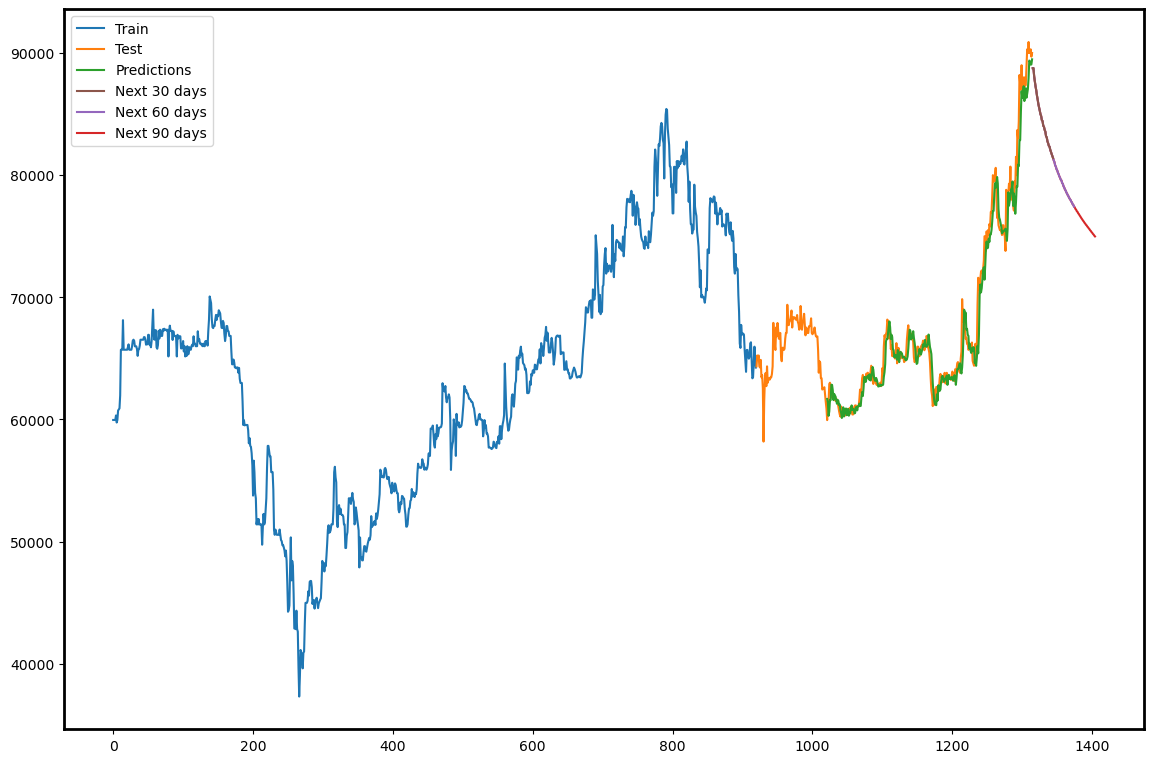

In [12]:
#12. Draw the plot
plt.figure(figsize=(12, 8))
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_SCS_73.png")
plt.show()